In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], 
  [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.10.1
2.10.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [4]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1384512   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,385,482
Trainable params: 1,385,482
Non-trainable params: 0
_________________________________________________________________


In [7]:
hist = model.fit(train_images, train_labels, batch_size=256, 
                 validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
235/235 [==============================] - 9s 6ms/step - loss: 0.6821 - accuracy: 0.7697 - val_loss: 0.3918 - val_accuracy: 0.8638
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.4375 - accuracy: 0.8496 - val_loss: 0.3383 - val_accuracy: 0.8785
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3819 - accuracy: 0.8659 - val_loss: 0.3166 - val_accuracy: 0.8851
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3517 - accuracy: 0.8775 - val_loss: 0.3021 - val_accuracy: 0.8904
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.8841 - val_loss: 0.2979 - val_accuracy: 0.8925
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3097 - accuracy: 0.8890 - val_loss: 0.2913 - val_accuracy: 0.8917
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2933 - accuracy: 0.8941 - val_loss: 0.2875 - val_accuracy: 0.8937
Epoch 

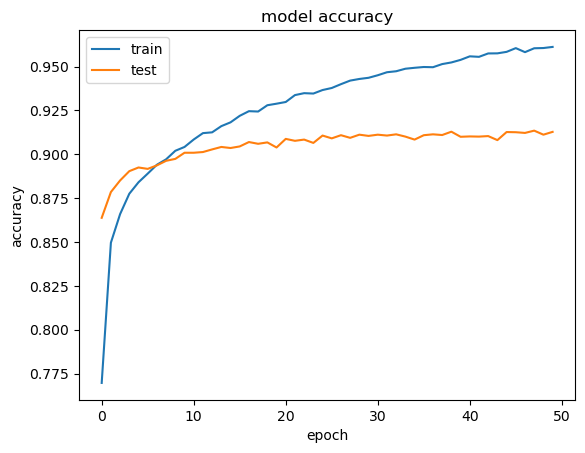

In [8]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

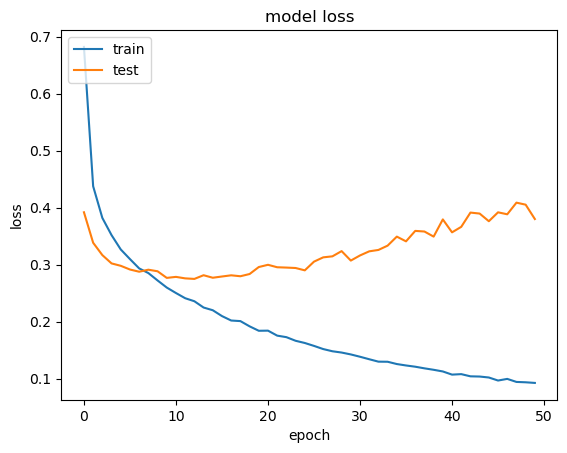

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

เมื่อเราลองใช้ dropout จะเห็นได้ว่าโมเดลของเรานั้นมีความ regularize มากขึ้นอย่างเห็นได้ชัด <br>
มีความแม่นยำมากขึ้นเมื่อเจอข้อมูลที่ไม่เคยเห็นมาก่อน

***ทีนี้มาดูกันต่อว่า ถ้า dropout 2 ครั้งจะได้ผลเป็นอย่างไรบ้าง ดูไฟล์ Convolution + Dense 64 + Dropout-Twice at 05***